In [1]:
from typing import TypedDict
class PortfolioState(TypedDict):
    amount_usd: float
    total_usd: float
    total_inr: float

In [ ]:
my_obj: PortfolioState = {
    "amount_usd": 100,
    "total_usd": 100,
    "total_inr": 34}

In [2]:
def calc_total(state: PortfolioState) -> PortfolioState:
    state["total_usd"] = state["amount_usd"] * 1.08
    return state


def convert_to_inr(state: PortfolioState) -> PortfolioState:
    state["total_inr"] = state["total_usd"] * 85
    return state

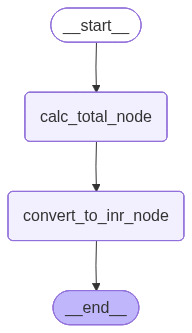

In [4]:
from langgraph.graph import StateGraph, START, END
builder = StateGraph(PortfolioState)

builder.add_node("calc_total_node", calc_total)
builder.add_node("convert_to_inr_node", convert_to_inr)

builder.add_edge(START, "calc_total_node")
builder.add_edge("calc_total_node", "convert_to_inr_node")
builder.add_edge("convert_to_inr_node", END)


graph =builder.compile()

from IPython.display import Image, display
display(Image(graph.get_graph().draw_mermaid_png()))

